In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [7]:
df = pd.read_csv("spotify-2023.csv",encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [9]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [10]:
nan_values = df.isna()
print(nan_values)

     track_name  artist(s)_name  artist_count  released_year  released_month  \
0         False           False         False          False           False   
1         False           False         False          False           False   
2         False           False         False          False           False   
3         False           False         False          False           False   
4         False           False         False          False           False   
..          ...             ...           ...            ...             ...   
948       False           False         False          False           False   
949       False           False         False          False           False   
950       False           False         False          False           False   
951       False           False         False          False           False   
952       False           False         False          False           False   

     released_day  in_spotify_playlists

In [14]:
df = df.dropna(subset=["key"])

In [15]:
df.dropna(inplace=True)

In [16]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            817 non-null    object 
 1   artist(s)_name        817 non-null    object 
 2   artist_count          817 non-null    int64  
 3   released_year         817 non-null    int64  
 4   released_month        817 non-null    int64  
 5   released_day          817 non-null    int64  
 6   in_spotify_playlists  817 non-null    int64  
 7   in_spotify_charts     817 non-null    int64  
 8   streams               816 non-null    float64
 9   in_apple_playlists    817 non-null    int64  
 10  in_apple_charts       817 non-null    int64  
 11  in_deezer_playlists   817 non-null    object 
 12  in_deezer_charts      817 non-null    int64  
 13  in_shazam_charts      817 non-null    object 
 14  bpm                   817 non-null    int64  
 15  key                   817 no

In [19]:
track_name_to_id = {name: idx for idx, name in enumerate(df['track_name'].unique())}

df['track_id'] = df['track_name'].map(track_name_to_id)
df.drop(columns=['track_name'], inplace=True)

In [20]:
voi_col = ['track_id', 'streams', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
df_voi = df[voi_col]
df_voi.head()

,track_id,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0,141381703.0,125,B,Major,80,89,83,31,0,8,4
1,1,133716286.0,92,C#,Major,71,61,74,7,0,10,4
2,2,140003974.0,138,F,Major,51,32,53,17,0,31,6
3,3,800840817.0,170,A,Major,55,58,72,11,0,11,15
4,4,303236322.0,144,A,Minor,65,23,80,14,63,11,6


In [21]:
df_feature = df_voi
df_feature = pd.get_dummies(df_voi, columns=['key', 'mode'], prefix = ['key', 'mode'])

In [22]:
df_feature.head()

,track_id,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0,141381703.0,125,80,89,83,31,0,8,4,...,False,False,False,False,False,False,False,False,True,False
1,1,133716286.0,92,71,61,74,7,0,10,4,...,True,False,False,False,False,False,False,False,True,False
2,2,140003974.0,138,51,32,53,17,0,31,6,...,False,False,False,False,True,False,False,False,True,False
3,3,800840817.0,170,55,58,72,11,0,11,15,...,False,False,False,False,False,False,False,False,True,False
4,4,303236322.0,144,65,23,80,14,63,11,6,...,False,False,False,False,False,False,False,False,False,True


#df_features = df_features.apply(pd.to_numeric, errors='coerce')

In [23]:
re_col = {
    'danceability_%': 'danceability',
    'valence_%': 'valence',
    'energy_%': 'energy',
    'acousticness_%': 'acousticness',
    'instrumentalness_%': 'instrumentalness',
    'liveness_%': 'liveness',
    'speechiness_%': 'speechiness'
}

df_feature.rename(columns=re_col, inplace=True)
df_feature.head()

,track_id,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0,141381703.0,125,80,89,83,31,0,8,4,...,False,False,False,False,False,False,False,False,True,False
1,1,133716286.0,92,71,61,74,7,0,10,4,...,True,False,False,False,False,False,False,False,True,False
2,2,140003974.0,138,51,32,53,17,0,31,6,...,False,False,False,False,True,False,False,False,True,False
3,3,800840817.0,170,55,58,72,11,0,11,15,...,False,False,False,False,False,False,False,False,True,False
4,4,303236322.0,144,65,23,80,14,63,11,6,...,False,False,False,False,False,False,False,False,False,True


In [27]:
df_da = df_feature.drop(columns=['track_id'])
df_da.head()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,141381703.0,125,80,89,83,31,0,8,4,False,...,False,False,False,False,False,False,False,False,True,False
1,133716286.0,92,71,61,74,7,0,10,4,False,...,True,False,False,False,False,False,False,False,True,False
2,140003974.0,138,51,32,53,17,0,31,6,False,...,False,False,False,False,True,False,False,False,True,False
3,800840817.0,170,55,58,72,11,0,11,15,True,...,False,False,False,False,False,False,False,False,True,False
4,303236322.0,144,65,23,80,14,63,11,6,True,...,False,False,False,False,False,False,False,False,False,True


In [28]:
#df_da= = df_feature.astype(int)

In [29]:
df_da.describe()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
count,8.160000e+02,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,4.689858e+08,122.565483,67.391677,51.201958,64.362301,26.309670,1.676867,18.168911,10.526316
std,5.231267e+08,28.174803,14.688458,23.620978,16.107587,25.470972,8.767328,13.541996,10.219987
min,2.762000e+03,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.342848e+08,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,2.638368e+08,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,6.011986e+08,141.000000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,3.562544e+09,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [32]:
binary_cols = ['key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor']

for column in binary_cols:
    df_da[column] = df_da[column].astype(int)
print(df_da.head())

       streams  bpm  danceability  valence  energy  acousticness  \
0  141381703.0  125            80       89      83            31   
1  133716286.0   92            71       61      74             7   
2  140003974.0  138            51       32      53            17   
3  800840817.0  170            55       58      72            11   
4  303236322.0  144            65       23      80            14   

   instrumentalness  liveness  speechiness  key_A  ...  key_C#  key_D  key_D#  \
0                 0         8            4      0  ...       0      0       0   
1                 0        10            4      0  ...       1      0       0   
2                 0        31            6      0  ...       0      0       0   
3                 0        11           15      1  ...       0      0       0   
4                63        11            6      1  ...       0      0       0   

   key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0      0      0       0      0       0 

In [33]:
df_da = df_da.astype(float)
df_da.head()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,141381703.0,125.0,80.0,89.0,83.0,31.0,0.0,8.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,133716286.0,92.0,71.0,61.0,74.0,7.0,0.0,10.0,4.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,140003974.0,138.0,51.0,32.0,53.0,17.0,0.0,31.0,6.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,800840817.0,170.0,55.0,58.0,72.0,11.0,0.0,11.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,303236322.0,144.0,65.0,23.0,80.0,14.0,63.0,11.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
df_da.shape

(817, 22)

In [35]:
scaler = MinMaxScaler()

df_da['streams'] = scaler.fit_transform(df_da[['streams']])
print(df_da.head())

    streams    bpm  danceability  valence  energy  acousticness  \
0  0.039685  125.0          80.0     89.0    83.0          31.0   
1  0.037533   92.0          71.0     61.0    74.0           7.0   
2  0.039298  138.0          51.0     32.0    53.0          17.0   
3  0.224794  170.0          55.0     58.0    72.0          11.0   
4  0.085117  144.0          65.0     23.0    80.0          14.0   

   instrumentalness  liveness  speechiness  key_A  ...  key_C#  key_D  key_D#  \
0               0.0       8.0          4.0    0.0  ...     0.0    0.0     0.0   
1               0.0      10.0          4.0    0.0  ...     1.0    0.0     0.0   
2               0.0      31.0          6.0    0.0  ...     0.0    0.0     0.0   
3               0.0      11.0         15.0    1.0  ...     0.0    0.0     0.0   
4              63.0      11.0          6.0    1.0  ...     0.0    0.0     0.0   

   key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0    0.0    0.0     0.0    0.0     0.0       

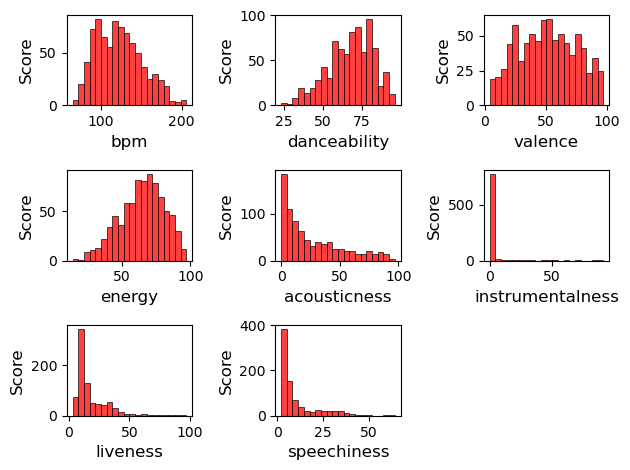

In [37]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

for i, column in enumerate(columns_to_plot, 1): 
    plt.subplot(3, 3, i)
    sns.histplot(data=df_da, x=column, bins=20, color='red')
    plt.xlabel(column, fontsize= 12)
    plt.ylabel("Score", fontsize= 12)

plt.tight_layout()
plt.show()

In [38]:
columns_to_correlate = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'streams']

correlation_matrix = df_da[columns_to_correlate].corr()
print(correlation_matrix)

                       bpm  danceability   valence    energy  acousticness  \
bpm               1.000000     -0.148174  0.029169  0.013363     -0.010767   
danceability     -0.148174      1.000000  0.389729  0.157970     -0.240454   
valence           0.029169      0.389729  1.000000  0.349736     -0.064072   
energy            0.013363      0.157970  0.349736  1.000000     -0.552637   
acousticness     -0.010767     -0.240454 -0.064072 -0.552637      1.000000   
instrumentalness -0.003407     -0.102144 -0.147032 -0.051662      0.046700   
liveness         -0.005817     -0.100579  0.000142  0.111240     -0.046112   
speechiness       0.038248      0.201189  0.035704 -0.026880     -0.017820   
streams          -0.025694     -0.093268 -0.051014 -0.036499     -0.005751   

                  instrumentalness  liveness  speechiness   streams  
bpm                      -0.003407 -0.005817     0.038248 -0.025694  
danceability             -0.102144 -0.100579     0.201189 -0.093268  
valence  

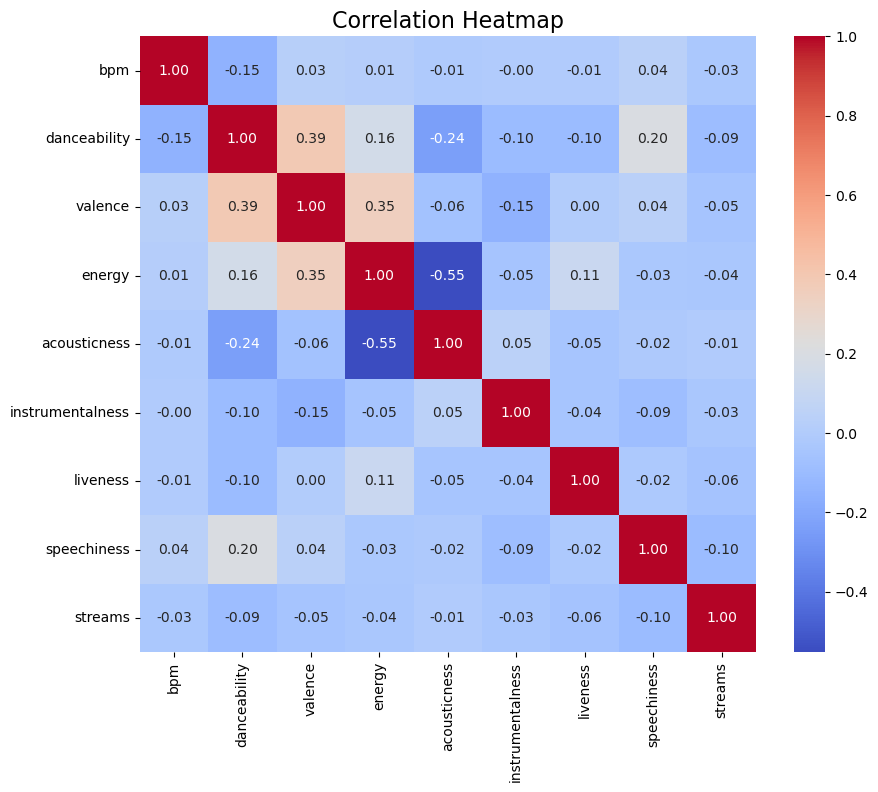

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

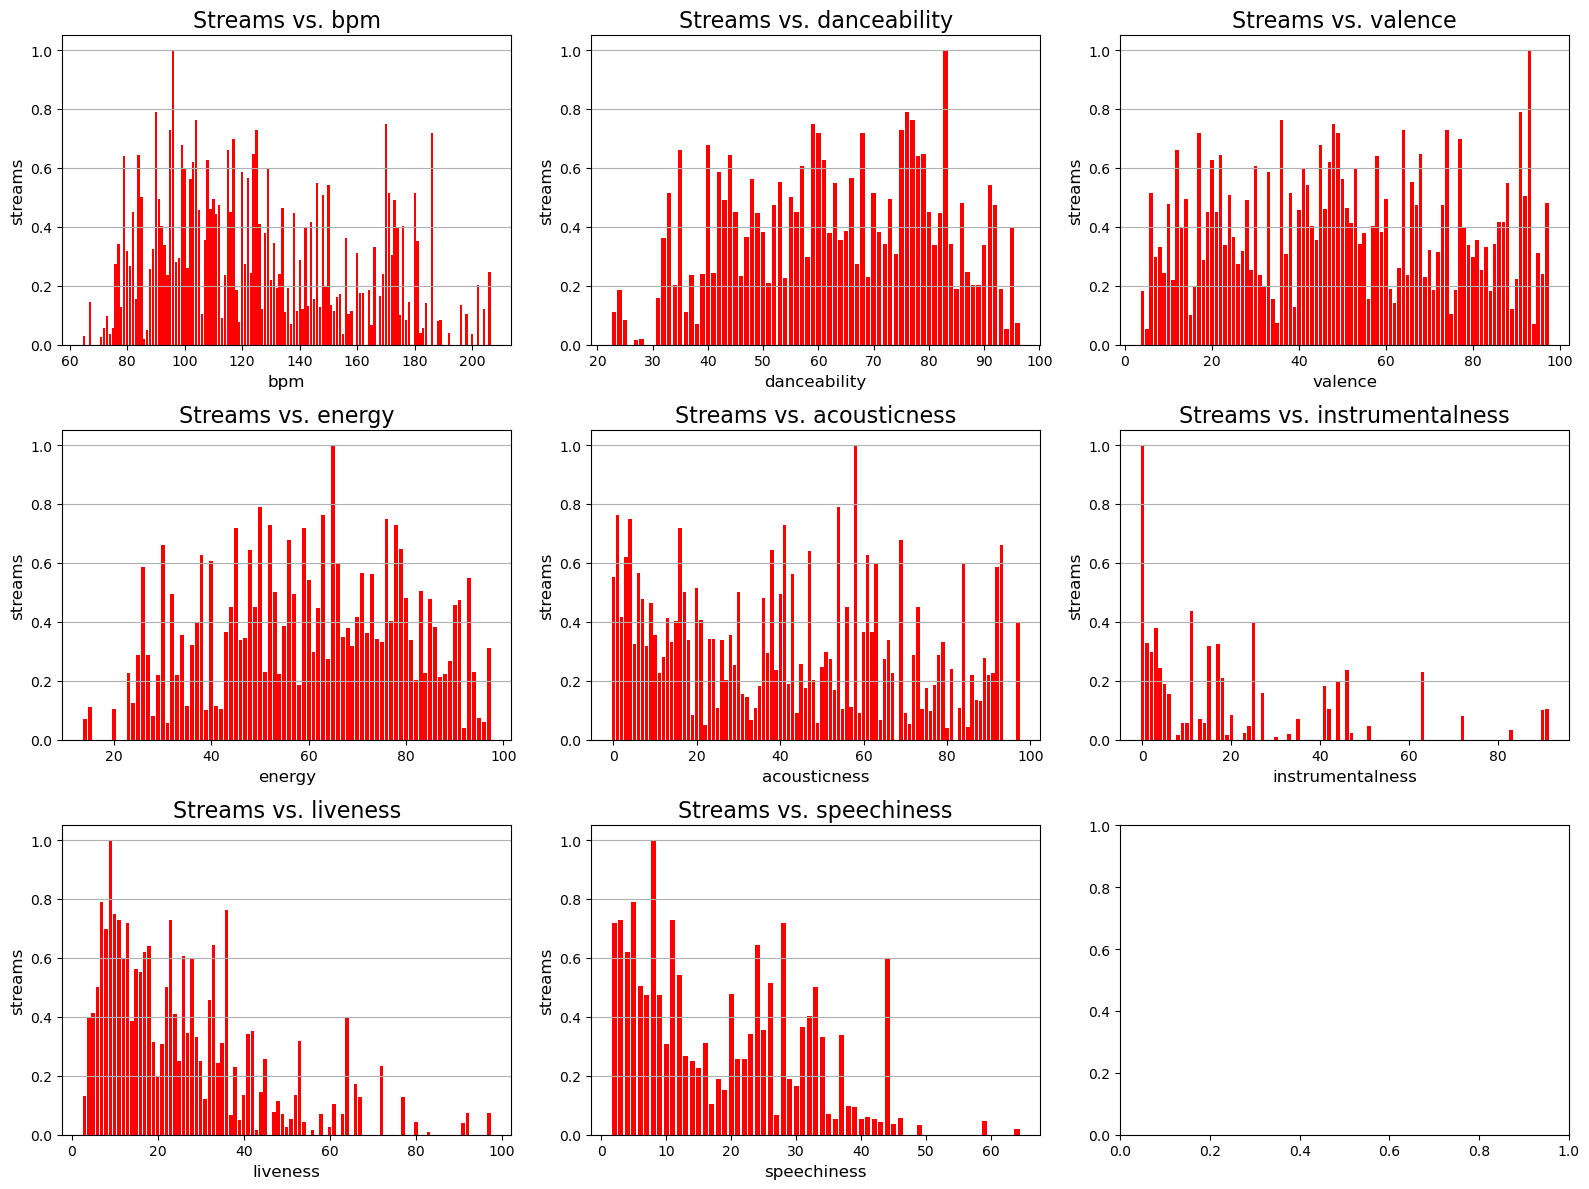

In [40]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    plt.bar(df_da[column], df_da['streams'], color='red')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=16)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

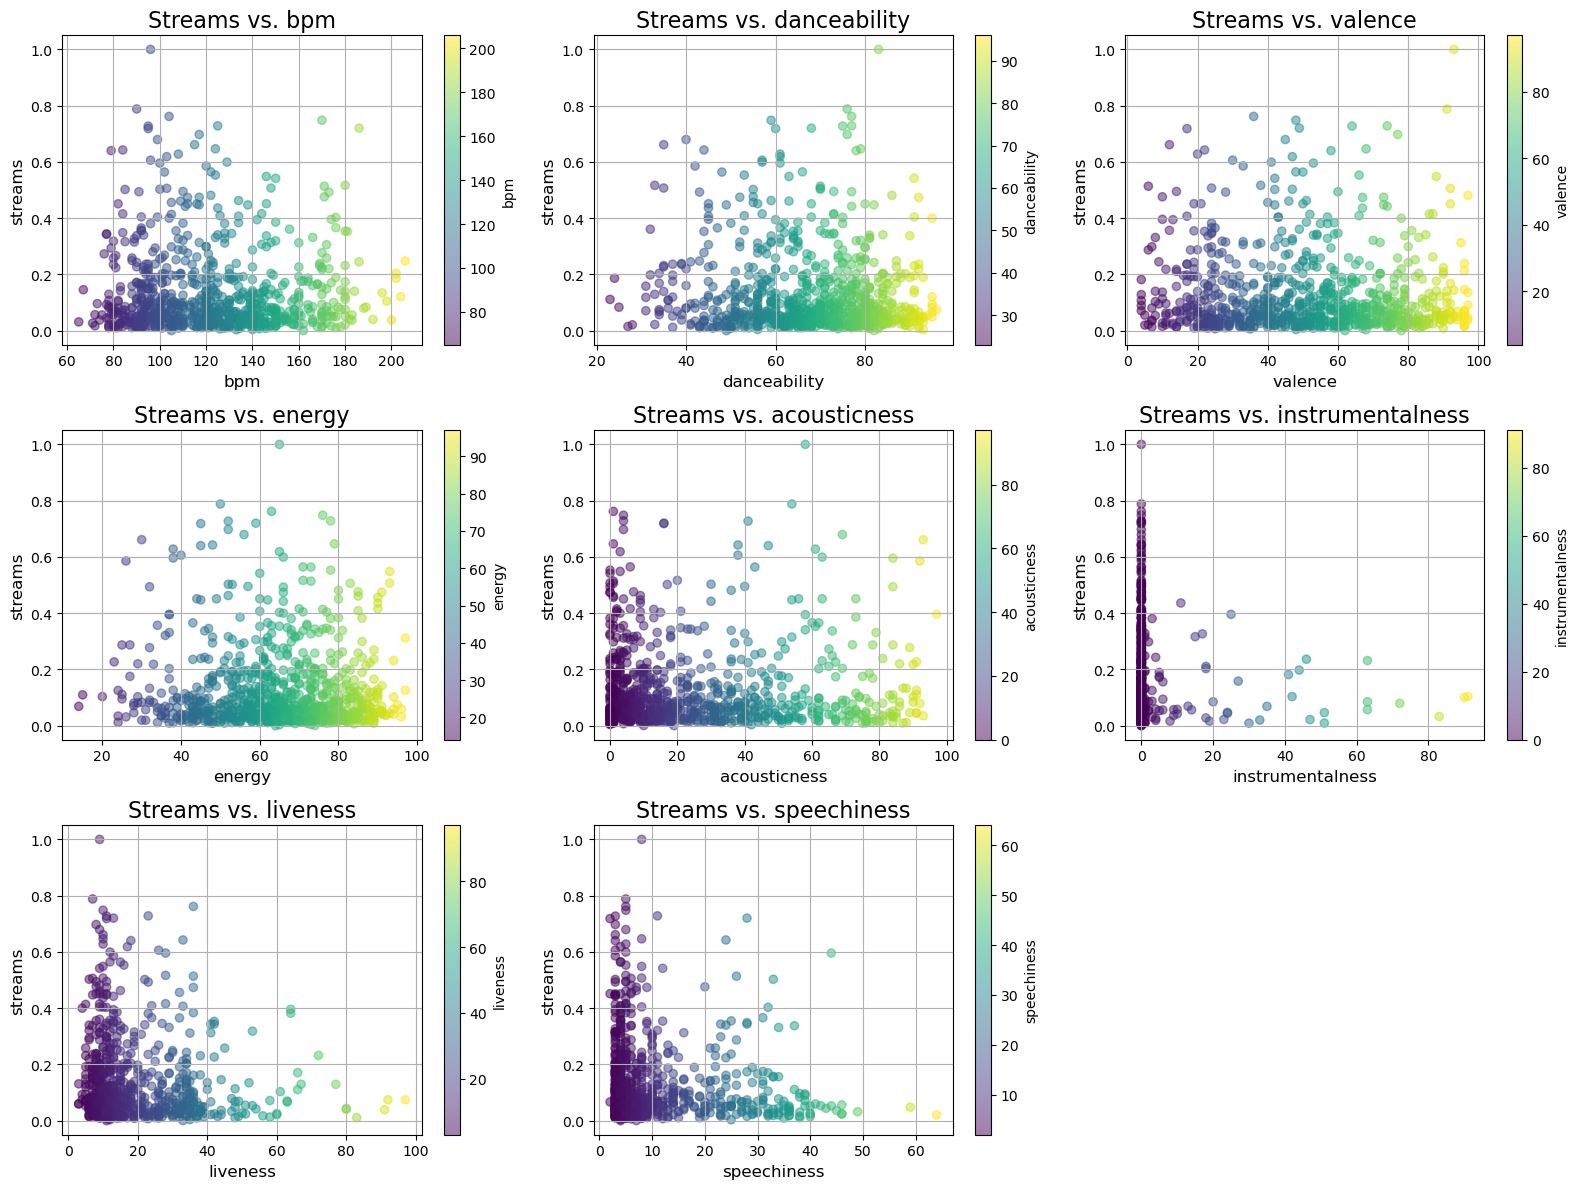

In [49]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()
colormap = plt.colormaps['viridis']

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df_da[column], df_da['streams'], c=df_da[column], cmap=colormap, alpha=0.5)

    plt.xlabel(column, fontsize=12)
    plt.ylabel('streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=16)
    plt.grid(True)
    plt.colorbar(scatter, label=column)

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()


In [50]:
df_da = df_da.merge(df[['key']], left_index=True, right_index=True, how='inner')
df_da.head()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,...,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,key
0,0.039685,125.0,80.0,89.0,83.0,31.0,0.0,8.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,B
1,0.037533,92.0,71.0,61.0,74.0,7.0,0.0,10.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,C#
2,0.039298,138.0,51.0,32.0,53.0,17.0,0.0,31.0,6.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,F
3,0.224794,170.0,55.0,58.0,72.0,11.0,0.0,11.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,A
4,0.085117,144.0,65.0,23.0,80.0,14.0,63.0,11.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,A


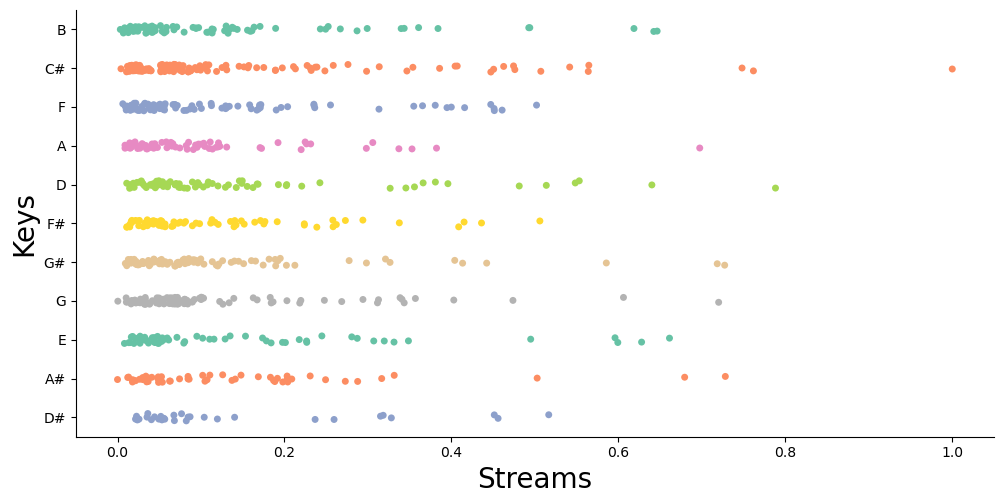

In [77]:
palette = sns.color_palette("Set2", len(df_da['key'].unique()))

sns.catplot(y="key", x="streams", data=df_da, aspect=2, palette=palette, legend=False, hue="key")
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Keys", fontsize=20)
plt.show()

In [78]:
average_streams = df_da.groupby('key')['streams'].mean().sort_values(ascending=False).index.tolist()

In [80]:
key_counts = df_da['key'].value_counts().reset_index()
key_counts.columns = ['key', 'count']

total_count_key = key_counts['count'].sum()
total_row = pd.DataFrame({'key': ['total'], 'count': [total_count_key]})
key_counts = pd.concat([key_counts, total_row])

total_counts = df_da['key'].count()

is_equal = total_counts == key_counts[key_counts['key'] == 'total']['count'].values[0]
print("Is total_count equal to 'total'Key? ", is_equal)

print("Total count of values in the 'key' column:", total_counts)
print(key_counts)

Is total_count equal to 'total'Key?  True
Total count of values in the 'key' column: 817
      key  count
0      C#    115
1       G     91
2       F     87
3      G#     85
4       D     78
5       B     77
6       A     71
7      F#     69
8       E     59
9      A#     55
10     D#     30
0   total    817


In [79]:
key_counts = key_counts[key_counts['key'] != 'total']
key_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     11 non-null     object
 1   count   11 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 264.0+ bytes


In [81]:
df_da.columns = df_da.columns.str.lower()
key_counts.columns = key_counts.columns.str.lower()

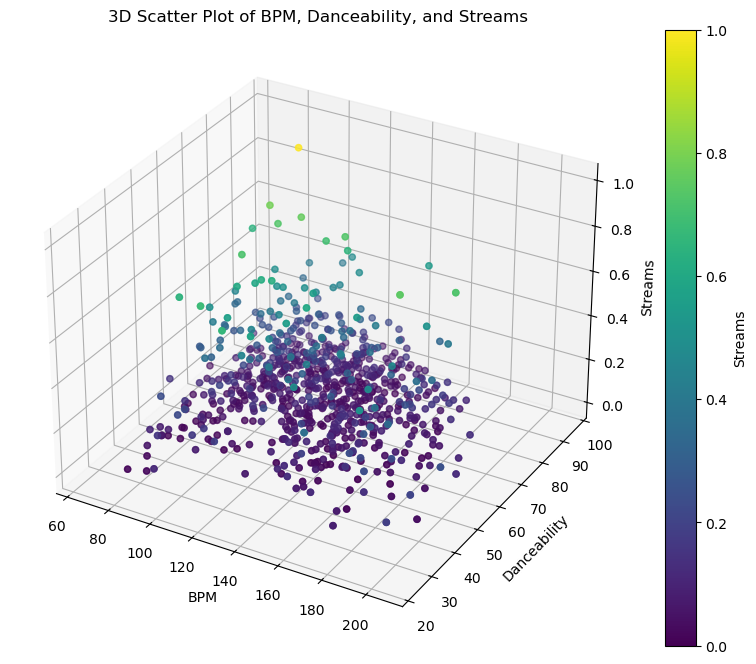

In [84]:
bpm = df_da['bpm']
danceability = df_da['danceability']
stream = df_da['streams']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(bpm, danceability, stream, c=stream, cmap='viridis', marker='o')

ax.set_xlabel('BPM')
ax.set_ylabel('Danceability')
ax.set_zlabel('Streams')

cbar = fig.colorbar(ax.scatter(bpm, danceability, stream, c=stream, cmap='viridis', marker='o'), ax=ax)
cbar.set_label('Streams', rotation=90)

plt.title('3D Scatter Plot of BPM, Danceability, and Streams')
plt.show()


In [85]:
%whos

Variable               Type              Data/Info
--------------------------------------------------
Axes3D                 type              <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
MinMaxScaler           type              <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
average_streams        list              n=11
ax                     Axes3D            Axes3D(0.129,0.11;0.616x0.77)
axes                   ndarray           9: 9 elems, type `object`, 72 bytes
binary_cols            list              n=13
bpm                    Series            0      125.0\n1       92.<...>ngth: 817, dtype: float64
cbar                   Colorbar          <matplotlib.colorbar.Colo<...>ar object at 0x16c5a9d30>
colormap               ListedColormap    <matplotlib.colors.Listed<...>ap object at 0x16b566cc0>
column                 str               speechiness
columns_to_correlate   list              n=9
columns_to_plot        list              n=8
correlation_matrix     DataFrame         